## Name: Nguyen Minh Huy Duong

### Assignment 3

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('housing.csv')
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
# Check for missing value
na_counts = dataset.isna().sum()
print("NA counts in training data:")
print(na_counts)

NA counts in training data:
price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64


In [4]:
# Extracting data
X = dataset.drop(columns=['price'])
y = dataset['price']  # Target variable

In [5]:
# Convert yes/no column in to binary
category_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
X[category_columns] = X[category_columns].replace({'yes': 1, 'no': 0})
X

C:\Users\minhh\AppData\Local\Temp\ipykernel_7220\1641500606.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[category_columns] = X[category_columns].replace({'yes': 1, 'no': 0})


,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,1,1,0,0,1,0,0
542,6000,3,2,4,1,0,0,0,1,0,0
543,6000,3,2,4,1,1,0,0,1,1,0
544,6000,3,2,2,1,1,0,0,1,1,0


### 1. Linear regression with gradient decent

### 1.1

In [6]:
def normalization(X: pd.DataFrame):
    X_norm = (X - X.min()) / (X.max() - X.min())
    return X_norm

In [7]:
def calculate_J(X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)              # Number of Sample
    y_pred = X.dot(weights)     # y^
    J = (1/m) * np.sum((y_pred - y) ** 2)
    return J

In [8]:
def calculate_R2(y_pred, y):
    # Calculate R-squared
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - y.mean()) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [9]:
def gradient_descent(alpha, epochs, X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)
    for epoch in range(0, epochs):
        y_pred = X.dot(weights)
        gradient = 2/m * (y_pred - y).T.dot(X) 
        weights -= alpha * gradient
        if epoch < 10:
            print(f"Epoch number: {epoch + 1}")
            print(f"Root Mean Square Error: {np.sqrt(calculate_J(X, y, weights))} \n")
    return weights

In [10]:
# normalize the dataset
X_norm = normalization(X)
# Add a column of ones to include intercept term
X_norm = np.c_[np.ones(X_norm.shape[0]), X_norm]  # Adds a column of 1s for the bias term
# y = y.values.reshape(-1, 1)

In [11]:
weights = np.zeros(X_norm.shape[1])
alpha = 0.15
epochs = 10000
optimum_weight = gradient_descent(alpha, epochs, X_norm, y, weights)

# Make predictions on the original scale using optimized weights
y_pred = X_norm.dot(optimum_weight)

Epoch number: 1
Root Mean Square Error: 26346.436498591705 

Epoch number: 2
Root Mean Square Error: 20208.558904892678 

Epoch number: 3
Root Mean Square Error: 19605.449992858295 

Epoch number: 4
Root Mean Square Error: 19404.80500547039 

Epoch number: 5
Root Mean Square Error: 19240.10671515424 

Epoch number: 6
Root Mean Square Error: 19087.92340693883 

Epoch number: 7
Root Mean Square Error: 18945.894916328194 

Epoch number: 8
Root Mean Square Error: 18813.029010673297 

Epoch number: 9
Root Mean Square Error: 18688.503024488506 

Epoch number: 10
Root Mean Square Error: 18571.58272819686 



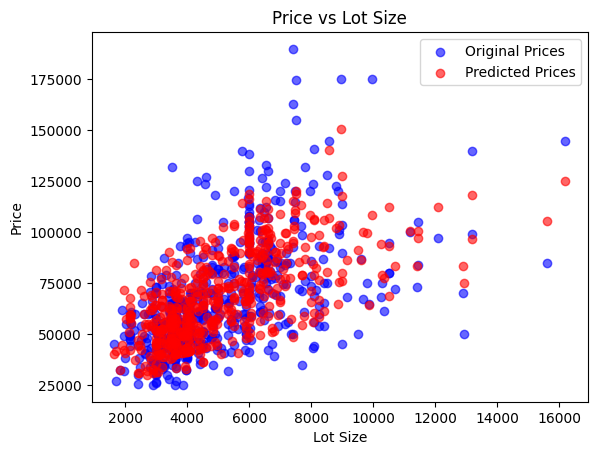

In [12]:
# Plot Price vs Lot Size
plt.scatter(dataset['lotsize'], y, color='blue',alpha=0.6, label='Original Prices')
plt.scatter(dataset['lotsize'], y_pred, color='red', alpha=0.6, label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size')
plt.legend()
plt.show()

R Squared: 0.6731236206414506


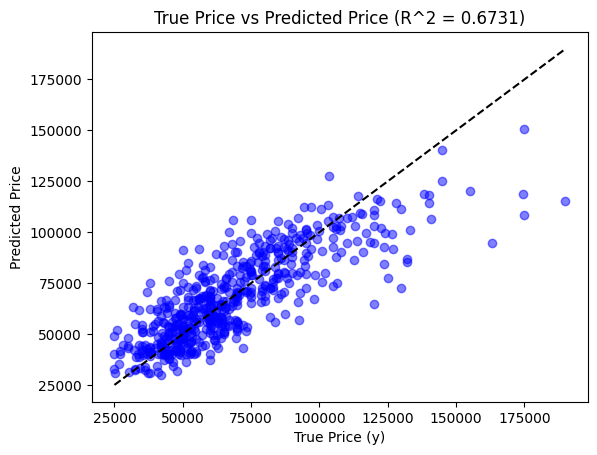

In [13]:
# Calculate R^2 on the original scale and plot true vs predicted prices
r2 = calculate_R2(y_pred, y)
print(f"R Squared: {r2}")
plt.scatter(y, y_pred, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Price (y)')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')
plt.show()

### 1.2

In [14]:
def calculate_J_part2(X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)                  # Number of Sample
    y_pred = X.dot(weights)     # y^
    error = y_pred - y
    J = (1/m) * (error.T.dot(error))
    return J

In [15]:
def gradient_descent_part2(alpha, epochs, X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)
    for epoch in range(0, epochs):
        y_pred = X.dot(weights)
        gradient = 2/m * X.T.dot(y_pred - y)
        weights -= alpha * gradient
        if epoch < 10:
            print(f"Epoch number: {epoch + 1}")
            print(f"Root Mean Square Error: {np.sqrt(calculate_J_part2(X, y, weights))} \n")
    return weights

In [16]:
weights = np.zeros(X_norm.shape[1])
alpha = 0.15
epochs = 10000
optimum_weight = gradient_descent_part2(alpha, epochs, X_norm, y, weights)

# Make predictions on the original scale using optimized weights
y_pred_part2 = X_norm.dot(optimum_weight)

Epoch number: 1
Root Mean Square Error: 26346.436498591705 

Epoch number: 2
Root Mean Square Error: 20208.558904892674 

Epoch number: 3
Root Mean Square Error: 19605.449992858295 

Epoch number: 4
Root Mean Square Error: 19404.80500547039 

Epoch number: 5
Root Mean Square Error: 19240.106715154245 

Epoch number: 6
Root Mean Square Error: 19087.92340693883 

Epoch number: 7
Root Mean Square Error: 18945.894916328194 

Epoch number: 8
Root Mean Square Error: 18813.029010673297 

Epoch number: 9
Root Mean Square Error: 18688.503024488506 

Epoch number: 10
Root Mean Square Error: 18571.582728196863 



R Squared: 0.6731236206414506


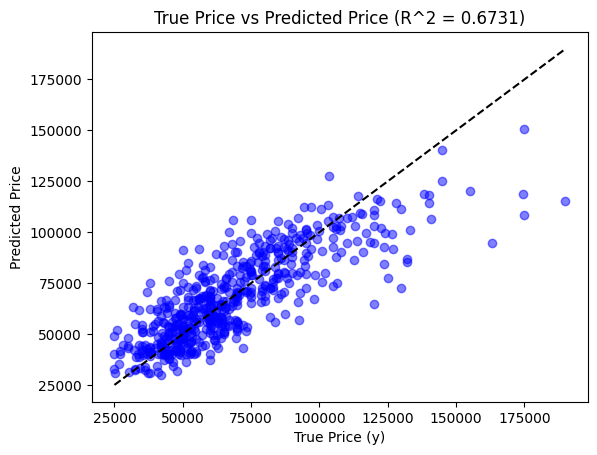

In [17]:
# Calculate R^2 on the original scale and plot true vs predicted prices
r2 = calculate_R2(y_pred_part2, y)
print(f"R Squared: {r2}")
plt.scatter(y, y_pred_part2, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('True Price (y)')
plt.ylabel('Predicted Price')
plt.title(f'True Price vs Predicted Price (R^2 = {r2:.4f})')
plt.show()

### 2. Binary classification with logistic regression

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
dataset_train = pd.read_csv('heart_disease_train.csv')
dataset_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [20]:
dataset_test = pd.read_csv('heart_disease_test.csv')
dataset_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [21]:
# Count of NA values in each column of the training dataset
na_counts_train = dataset_train.isna().sum()
print("NA counts in training data:")
print(na_counts_train)

NA counts in training data:
gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64


In [22]:
# Count of NA values in each column of the training dataset
na_counts_test = dataset_test.isna().sum()
print("NA counts in training data:")
print(na_counts_test)

NA counts in training data:
gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64


In [23]:
dataset_train = dataset_train.fillna(dataset_train.mean())
# Count of NA values in each column of the training dataset
na_counts_train = dataset_train.isna().sum()
print("NA counts in training data:")
print(na_counts_train)

NA counts in training data:
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [24]:
# use the train set to fillout the missing data for test set
dataset_test = dataset_test.fillna(dataset_train.mean())
# Count of NA values in each column of the training dataset
na_counts_test = dataset_test.isna().sum()
print("NA counts in test data:")
print(na_counts_test)

NA counts in test data:
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [26]:
def initialize_weights(n_features):
    return np.zeros(n_features)

In [27]:
def calculate_J_logistic(X: np.ndarray, y: np.ndarray, weights: np.ndarray):
    m = len(y)
    y_pred = sigmoid(X.dot(weights))

    # Clip predictions to avoid log(0)
    epsilon = 1e-10  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    J = (-1/m) * (np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    return J

In [28]:
def predict(X, weights, threshold=0.5):
    z = X.dot(weights)
    y_pred = sigmoid(z)
    return (y_pred >= threshold).astype(int)

In [29]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1)) # True Possitive
    TN = np.sum((y_true == 0) & (y_pred == 0)) # True Negative
    FP = np.sum((y_true == 0) & (y_pred == 1)) # False Possitive
    FN = np.sum((y_true == 1) & (y_pred == 0)) # False Negative
    return np.array([[TP, FN], [FP, TN]])

In [30]:
def accuracy(cm):
    return (cm[0,0] + cm[1, 1]) / np.sum(cm)

In [31]:
def precision(cm):
    return cm[0,0] / (cm[0,0] + cm[1,0])

In [32]:
def recall(cm):
    return cm[0,0] / (cm[0,0] + cm[0,1])

In [33]:
def evaluate_model(y, y_pred):
    cm = confusion_matrix(y, y_pred)

    print("Training Confusion Matrix:\n", cm)
    print(f"Training Accuracy: {accuracy(cm)}")
    print(f"Training Precision: {precision(cm)}")
    print(f"Training Recall: {recall(cm)}")

In [34]:
def gradient_descent_3(alpha, X: np.ndarray, y: np.ndarray, y_pred:np.ndarray, weights: np.ndarray):
    m = len(y)
    gradient = (1/m) * X.T.dot(y_pred - y)
    weights -= alpha * gradient
    return weights

In [35]:
def train_logistic_regression(X, y, alpha, epochs):
    n_features = X.shape[1]
    weights = initialize_weights(n_features)
    for epoch in range(epochs):
        # Compute prediction
        z = X.dot(weights)
        y_pred = sigmoid(z)

        # update weights
        weights = gradient_descent_3(alpha, X, y, y_pred, weights)
        if epoch < 10:
            print(f"Cost at epoch {epoch + 1}: {calculate_J_logistic(X, y, weights)}")
    return weights

In [36]:
X_train = dataset_train.drop(columns=['TenYearCHD'])
y_train = dataset_train['TenYearCHD']

In [37]:
X_test = dataset_test.drop(columns=['TenYearCHD'])
y_test = dataset_test['TenYearCHD']

In [38]:
mean = X_train.mean()
std = X_train.std()

In [39]:
# Normalization
X_norm_train = (X_train - mean) / std
X_norm_train = np.c_[np.ones(X_norm_train.shape[0]), X_norm_train]  # Adds a column of 1s for the bias term


In [40]:
# Use the mean and std of train set to normalize the test set
X_norm_test = (X_test - mean) /std
X_norm_test = np.c_[np.ones(X_norm_test.shape[0]), X_norm_test]  # Adds a column of 1s for the bias term

In [41]:
alpha = 0.1
epochs = 10
optimum_weight = train_logistic_regression(X_norm_train, y_train, alpha, epochs)

Cost at epoch 1: 0.6787618021602292
Cost at epoch 2: 0.6652771053763932
Cost at epoch 3: 0.6526187846648395
Cost at epoch 4: 0.6407198033813326
Cost at epoch 5: 0.6295197327990721
Cost at epoch 6: 0.6189641033952429
Cost at epoch 7: 0.6090037885297821
Cost at epoch 8: 0.5995944322030614
Cost at epoch 9: 0.5906959265439107
Cost at epoch 10: 0.5822719405499424


In [42]:
y_train_pred = predict(X_norm_train, optimum_weight, threshold=0.5)
evaluate_model(y_train, y_train_pred)

Training Confusion Matrix:
 [[  96  420]
 [ 118 2756]]
Training Accuracy: 0.8412979351032448
Training Precision: 0.4485981308411215
Training Recall: 0.18604651162790697


In [43]:
y_test_pred = predict(X_norm_test, optimum_weight, threshold=0.5)
evaluate_model(y_test, y_test_pred)

Training Confusion Matrix:
 [[ 23 105]
 [ 30 690]]
Training Accuracy: 0.8408018867924528
Training Precision: 0.4339622641509434
Training Recall: 0.1796875
